In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt

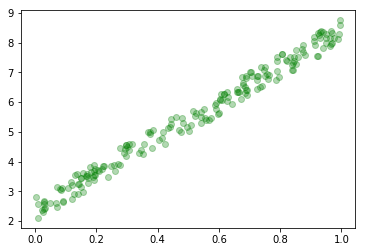

In [2]:
N = 200
x_data = torch.rand(N,1)
a, b, c = 6, 2, 0.8
y_data = a * x_data + b + c * torch.rand(x_data.size()) 
plt.plot(x_data.numpy(), y_data.numpy(), 'go', label = 'from data', alpha = .3)

In [3]:
class NN(nn.Module):
    
    def __init__(self, input_dim, output_dim):

        super(NN, self).__init__() 

        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        
        out = self.linear(x)
        
        return out

In [4]:
model = NN(1,1)

criterion = nn.MSELoss()

l_rate = 0.5
epochs = 100

optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

In [5]:
for epoch in range(epochs):

    epoch +=1

    inputs = Variable(x_data)
    labels = Variable(y_data)

    optimiser.zero_grad()
    
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimiser.step()

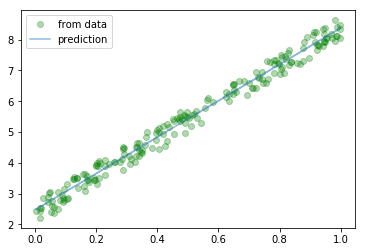

OrderedDict([('linear.weight', tensor([[5.9126]])), ('linear.bias', tensor([2.4670]))])


In [9]:
y_pred = model.forward(Variable(x_data)).data.numpy()
type(y_pred)
plt.plot(x_data.numpy(), y_data.numpy(), 'go', label = 'from data', alpha = .3)
plt.plot(x_data.numpy(), y_pred, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(model.state_dict())